# Particle Swam Optimizer

## pso

In [8]:
import numpy as np
import numpy.random

class ParticleSwarm:
    #w=0.72984
    def __init__(self, cost_func, dim, size, w=0.72984, phi_p=2.05, phi_g=2.05):
        self.cost_func = cost_func
        self.dim = dim

        self.size = size
        self.w = w
        self.phi_p = phi_p
        self.phi_g = phi_g
        self.mse =[]

        self.X = np.random.uniform(size=(self.size, self.dim))
        print("self.X : ",self.X.shape)
        self.V = np.random.uniform(size=(self.size, self.dim))

        self.P = self.X.copy()
        self.S = self.cost_func(self.X)
        print("S.shape",self.S.shape)
        self.g = self.P[self.S.argmin()]
        self.best_score = self.S.min()



    def optimize(self, epsilon=1e-3, max_iter=100):
        iteration = 0

        while self.best_score > epsilon and iteration < max_iter:
            self.update()
            iteration = iteration + 1

        return self.g

    def update(self):
        # Velocities update
        R_p = np.random.uniform(size=(self.size, self.dim))
        R_g = np.random.uniform(size=(self.size, self.dim))

        #self.V = self.w * (self.V + self.phi_p * R_p * (self.P - self.X) + self.phi_g * R_g * (self.g - self.X))
        self.V = self.w *self.V +self.phi_p*R_p*(self.P-self.X)+self.phi_g*R_g*(self.g-self.X)
        #new_vx = w * vx + ro1 * (p["x"] - x) + ro2 * (g["x"] - x)

        # Positions update

        self.X = self.X + self.V

        # Best scores

        scores = self.cost_func(self.X)
        better_scores_idx = scores < self.S
        #print("better_scores_idx",better_scores_idx)
        self.P[better_scores_idx] = self.X[better_scores_idx]
        #print("S[bsi]",self.S[better_scores_idx].shape)
        #print("score[bsi]",scores[better_scores_idx].shape)
        
        self.S[better_scores_idx] = scores[better_scores_idx]
        self.g = self.P[self.S.argmin()]
        
        self.best_score = self.S.min()
        self.mse=np.append(self.mse,self.best_score)

## MLP

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

class MultiLayerPerceptron:

    def __init__(self, shape, weights=None):
        self.shape = shape
        self.num_layers = len(shape)

        if weights is None:
            self.weights = []

            for i in range(self.num_layers-1):
                W = np.random.uniform(size=(self.shape[i+1], self.shape[i] + 1))
                self.weights.append(W)

        else:
            self.weights = weights

    def softmax(self, Z):
        """ソフトマックス関数"""
        return np.exp(Z)/np.sum(np.exp(Z), axis=1)[:, np.newaxis]

    def relu(self,Z):
        return   numpy.vectorize(lambda x: (np.maximum(x, 0)))(Z)

    def sigmoid(self,Z):
        return  1/ (1 + np.exp(-Z))
    
    def run(self, data):
        layer = data.T

        for i in range(self.num_layers-1):
            prev_layer = np.insert(layer, 0, 1, axis=0)
            o = np.dot(self.weights[i], prev_layer)
            #layer = 1 / (1 + np.exp(-o))
            #"""
            if i < (self.num_layers-2.0):
                #layer = self.sigmoid(o)
                layer = self.relu(o)
                
            if i==(self.num_layers-2.0):
                #print("relu",layer)
                layer = self.sigmoid(o)
                #layer = self.relu(o)

                #print("sigmoid",layer)
            #"""
            #layer = o
            
        return layer
    
    def calc_error(self, X, T):
        N = X.shape[0]
        err = 0.0
        for i in range(N):
            x = X[i, :]
            t = T[i, :]
            
            y = self.run(x)
            
            #print("z",z)
            #z [0.82279137 0.73710344]
            #print("y",y)
            #y [0.83577613 0.78362455]
            #print("t",t)
            #t [1 0]
            #print("y-t",(y-t).shape)
            #yy-t [ 0.81261095 -0.1861338 ]
            #shape[2,]
            #print("reshap(-1,1)",((y - t).reshape((-1, 1))).shape)
            #reshap(-1,1) [[ 0.81261095][-0.1861338 ]]
            #shape[2,1]
            #print("dot",(y-t).dot(y - t).reshape((-1, 1)))
            #dot [[0.77263737]]
            a=(y-t)[0]
            b=(y-t)[1]
            err_ = np.abs((a-b)/2)
            #print("mse:",err_)
            
            err += (y - t).dot((y - t).reshape((-1, 1))) / 2.0
            #print("err",err)
            #if i==0:
                    #print("err",err)
        return err_

    #交差エントロピー誤差
    def cross_entropy_error(self,X, T):
        delta = 1e-7
        N = X.shape[0]
        error = 0.0
        for i in range(N):
            x = X[i, :]
            t = T[i, :]
            #error = error -np.sum(t*np.log(x+delta))
            error = error - np.sum(t * np.log(x+delta) + (1 - t) * np.log(1 - x))
            
        error = error/N
        return error
  

## MNIST

In [10]:
import numpy as np
import sklearn



if __name__ == '__main__':
    import functools
    import sklearn.metrics
    import sklearn.datasets
    import sklearn.cross_validation



    def dim_weights(shape):
        dim = 0

        for i in range(len(shape)-1):
            dim = dim + (shape[i] + 1) * shape[i+1]
        #print("dim =",dim)
        return dim

    def weights_to_vector(weights):
        w = np.asarray([])

        for i in range(len(weights)):
            v = weights[i].flatten()
            w = np.append(w, v)
        print("weghts_to_vector : ",w)
        return w

    def vector_to_weights(vector, shape):
        weights = []
        idx = 0

        for i in range(len(shape)-1):
            r = shape[i+1]
            c = shape[i] + 1
            idx_min = idx
            idx_max = idx + r*c
            W = vector[idx_min:idx_max].reshape(r,c)
            weights.append(W)

        return weights

    def eval_neural_network(weights, shape, X, y):

        mse = np.asarray([])
        
        for w in weights:
            weights = vector_to_weights(w, shape)
            nn_mnist = MultiLayerPerceptron(shape, weights=weights)
            #y_pred = nn.run(X)
            y_pred_m = nn_mnist.run(X).T
            #print(y_pred_m)
            #print(y.shape)
            
            #Ms = sklearn.metrics.mean_squared_error(np.atleast_2d(y).T, y_pred_m)
            #mse = np.append(mse, Ms)
            
            #y_pred_m = nn_mnist.run(X)            
            #print(y_pred_m.shape)
            #print(y.shape)
            a=nn_mnist.cross_entropy_error(y_pred_m,y.T)
            mse=np.append(mse,a)

            
            
        return mse

    # Load MNIST digits from sklearn

    num_classes = 10
    mnist = sklearn.datasets.load_digits(num_classes)
    X, X_test, y, y_test = sklearn.cross_validation.train_test_split(mnist.data, mnist.target)
    num_inputs = X.shape[1]


    y_true = np.zeros((len(y), num_classes))

    for i in range(len(y)):
        y_true[i, y[i]] = 1

    y_test_true = np.zeros((len(y_test), num_classes))

    for i in range(len(y_test)):
        y_test_true[i, y_test[i]] = 1
    # Set up
    size = 5
    shape = (num_inputs, 64,32, num_classes)
    cost_func = functools.partial(eval_neural_network, shape=shape, X=X, y=y_true.T)
    swarm = ParticleSwarm(cost_func, dim=dim_weights(shape), size=size)

    # Train...

    i = 0
    epoch = 3
    N=1
    best_scores = [(i, swarm.best_score)]
    print(best_scores[-1])

    
           
    while swarm.best_score > 1e-6 and i<epoch:
    #while i < 1:
        #pso.updata
        for n in range(N):
            swarm.update()
            
        i = i+1
        
        
        if swarm.best_score < best_scores[-1][1]:
            best_scores.append((i, swarm.best_score))
            print(best_scores[-1])
        else :
            #if (i %1)==0:
            print(i,swarm.best_score)

    # Test...

    best_weights = vector_to_weights(swarm.g, shape)
    #best_weights = vector_to_weights(pso.__best_position,shape)
    best_nn = MultiLayerPerceptron(shape, weights=best_weights)
    y_test_pred = np.round(best_nn.run(X_test))
    #y_test_pred =best_nn.run(X_test)
    #print(y_test_pred)
    print(sklearn.metrics.classification_report(y_test_true, y_test_pred.T))



self.X :  (5, 6570)
S.shape (5,)
(0, 138.47850179990382)
1 138.47850179990382
(2, 101.13939883771417)
(3, 9.075866884439312)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        57
          1       0.11      0.46      0.17        39
          2       0.47      0.13      0.20        54
          3       0.10      1.00      0.18        44
          4       0.09      0.45      0.15        55
          5       0.11      0.73      0.19        48
          6       0.00      0.00      0.00        37
          7       0.00      0.00      0.00        40
          8       0.00      0.00      0.00        39
          9       0.08      1.00      0.15        37

avg / total       0.10      0.37      0.11       450



C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [250]:
count =3
print(y_test_true[count])
print(best_test_pred[count])

count_ = 0
for i in range(len(y_test_true)):
    if np.argmax(y_test_true[i])==np.argmax(best_test_pred[i]):
        #print("Accuracy :",i,np.argmax(y_test_true[i]))
        count_ +=1

print("Total_Accuracy : ",count_/len(y_test_true))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Total_Accuracy :  0.16


In [15]:
num_classes = 10
mnist = sklearn.datasets.load_digits(num_classes)
X, X_test, y, y_test = sklearn.cross_validation.train_test_split(mnist.data, mnist.target)
num_inputs = X.shape[1]
print(X.shape[1])

64


In [79]:
n =102
print(y_test_pred.T[n])
print(y_test_true[n])
bw = np.array(best_weights)
print(len(best_weights[0]))
swarm.g.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
64


(6570,)

In [306]:
tes_num = 101
test_best=best_nn.run(X_test)
a=np.argmax(test_best.T[tes_num])
print(test_best.T[tes_num])
print(a)
b=np.argmax(y_test_true[tes_num])
print(y_test_true[tes_num])
print(b)


best_test_pred = np.zeros((len(y_test_true), num_classes))

for i in range(len(y_test_true)):
    a=np.argmax(test_best.T[i])
    best_test_pred[i, a] = 1

print(best_test_pred[tes_num])

print(sklearn.metrics.classification_report(y_test_true, best_test_pred))

[[4364.18074834 4506.14999781 4386.50925964 ... 4772.83092499
  4342.20286234 5614.11612438]
 [4277.46948766 4433.74626655 4304.10829346 ... 4712.37532929
  4291.57457621 5499.86078922]
 [4720.31605248 4833.8236995  4719.99178134 ... 5143.57658116
  4710.78829282 6055.8211398 ]
 ...
 [4251.71035398 4411.25107167 4309.90120973 ... 4682.98883731
  4243.97810945 5490.9002907 ]
 [4634.50951365 4755.83903864 4637.63326172 ... 5053.98086305
  4630.79930113 5939.39661426]
 [4135.29459653 4262.8260651  4147.38814918 ... 4553.68663652
  4097.3549709  5275.79122785]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
             precision    recall  f1-score   support

          0       0.11      1.00      0.20        49
          1       0.00      0.00      0.00        36
          2       0.00      0.00      0.00        47
          3       0.00      0.00      0.00        47
          4       0.00      0.00      0.00        49
          5      

C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
class ParticleSwarm_im:
    #w=0.72984
    def __init__(self, cost_func, dim, size=50, w=0.72984,N=10):
        self.cost_func = cost_func
        self.dim = dim
        self.N = N


        self.size = size
        self.w = w
        self.X = np.random.uniform(size=(self.size, self.dim))
        self ps = [{"x"}]
        self.V = np.random.uniform(size=(self.size, self.dim))

        self.P = self.X.copy()
        self.S = self.cost_func(self.X)
        self.g = self.P[self.S.argmin()]
        self.best_score = self.S.min()



    def update(self):
        for n in range(N):
            # Velocities update
            ro_max = np.random.uniform(size=(self.size, self.dim))

            #self.V = self.w * (self.V + self.phi_p * R_p * (self.P - self.X) + self.phi_g * R_g * (self.g - self.X))
            self.V = self.w *self.V +ro_max*(self.P-self.X)+ro_max*(self.g-self.X)
            #new_vx = w * vx + ro1 * (p["x"] - x) + ro2 * (g["x"] - x)

            # Positions update
            self.X = self.X + self.V

            # Best scores

            scores = self.cost_func(self.X)
            better_scores_idx = scores < self.S
            self.P[better_scores_idx] = self.X[better_scores_idx]
            self.S[better_scores_idx] = scores[better_scores_idx]
            self.g = self.P[self.S.argmin()]
            self.best_score = self.S.min()

In [150]:
import sys
import numpy as np

class Particle(object):
    """粒子群最適化法の粒子を表すクラス"""

    def __init__(self, f, position, velocity, maxs=None, mins=None):
        """
        コンストラクタ
        @param f 最適化を行う関数
        @param position 粒子の初期位置
        @param velocity 粒子の初期速度
        @param maxs 粒子が移動可能な位置最大値
        @param mins 粒子が移動可能な位置最小値
        """
        self.__f = f
        self.__my_best_position = position
        self.__my_best_score = f(position)
        self.__my_position = position
        self.__my_velocity = velocity
        self.__maxs = maxs
        self.__mins = mins
        self.__WEIGHT_V = 0.8
        self.__WEIGHT_ME = 1.0
        self.__WEIGHT_US = 1.0

    @property
    def score(self):
        return self.__my_best_score

    @property
    def position(self):
        return np.array(self.__my_best_position)

    def move(self, best_position):
        """
        粒子を移動させるメソッド
        @param best_position 関数の最小値を与える粒子の位置
        """
        # 粒子の位置を更新する
        self.__my_position += self.__my_velocity
        # 範囲外に出た粒子は範囲内に収める
        if (self.__maxs is not None):
            max_out_of_range_index = self.__my_position > self.__maxs
            self.__my_position[max_out_of_range_index] = self.__maxs[max_out_of_range_index]
        if (self.__mins is not None):
            min_out_of_range_index = self.__my_position < self.__mins
            self.__my_position[min_out_of_range_index] = self.__mins[min_out_of_range_index]
        # 評価値を計算する
        score = self.__f(self.__my_position)
        # 最良解を更新する
        if (score < self.__my_best_score):
            self.__my_best_position = self.__my_position
            self.__my_best_score = score
        # 速度を更新する
        item1 = self.__WEIGHT_V*self.__my_velocity
        random_me = np.random.rand(self.__my_position.size)
        item2 = self.__WEIGHT_ME*random_me*(self.__my_best_position - self.__my_position)
        random_us = np.random.rand(self.__my_position.size)
        item3 = self.__WEIGHT_US*random_us*(best_position - self.__my_position)
        self.__my_velocity = item1 + item2 + item3
        # 範囲外に出た粒子の速度は0とする
        if (self.__maxs is not None): self.__my_velocity[max_out_of_range_index] = 0
        if (self.__mins is not None): self.__my_velocity[min_out_of_range_index] = 0

In [152]:
import sys

class ParticleSwarmOptimization(object):
    """粒子群最適化法により最適化を行うクラス"""

    def __init__(self, particles):
        """
        コンストラクタ
        @param particles 粒子のリスト
        """
        self.__particles = particles
        self.__best_score = sys.float_info.max
        for particle in self.__particles:
            if (particle.score < self.__best_score):
                self.__best_score = particle.score
                self.__best_position = particle.position

    @property
    def best_score(self):
        return self.__best_score

    @property
    def best_position(self):
        return self.__best_position

    def position(self, index):
        return [particle.position[index] for particle in self.__particles]

    def update(self):
        """
        粒子の位置を更新するメソッド
        """
        for particle in self.__particles:
            particle.move(self.__best_position)

        for particle in self.__particles:
            if (particle.score < self.__best_score):
                self.__best_score = particle.score
                self.__best_position = particle.position

In [158]:
tt = np.random.uniform(size=(50, 1000))
tt.shape

(50, 1000)

## XOR

In [37]:
if __name__ == '__main__':
    import functools
    import sklearn.metrics
    import sklearn.datasets
    import sklearn.cross_validation


    def eval_neural_network(weights, shape, X, y):

        mse = np.asarray([])
        
        for w in weights:
            weights = vector_to_weights(w, shape)
            nn = MultiLayerPerceptron(shape, weights=weights)
            y_pred = nn.run(X).T
           
            #a = nn.calc_error(X,y)

            a=nn.cross_entropy_error(y_pred,y)
            mse=np.append(mse,a)
            
            #mse = np.append(mse, sklearn.metrics.mean_squared_error(np.atleast_2d(y), y_pred))
            #print("mse",mse)
        return mse

    # Load MNIST digits from sklearn

    num_classes = 2
    X = numpy.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    T = numpy.array([[1, 0], [0, 1], [0, 1], [1, 0]])
    
    num_inputs = X.shape[1]


    # Set up
    size = 200
    shape = (num_inputs,2,num_classes)
    cost_func = functools.partial(eval_neural_network, shape=shape, X=X, y=T)
    swarm = ParticleSwarm(cost_func, dim=dim_weights(shape), size=size)

    # Train...

    i = 0
    epoch = 1000
    N=1
    best_scores = [(i, swarm.best_score)]
    print(best_scores[-1])

                 
    while swarm.best_score > 1e-6 and i<epoch:
    #while i < 1:
        #pso.updata
        for n in range(N):
            swarm.update()
            
        i = i+1
        
        
        if swarm.best_score < best_scores[-1][1]:
            best_scores.append((i, swarm.best_score))
            print(best_scores[-1])
        else :
            print(i)

    # Test...

    best_weights = vector_to_weights(swarm.g, shape)
    #best_weights = vector_to_weights(pso.__best_position,shape)
    best_nn = MultiLayerPerceptron(shape, weights=best_weights)
    y_test_pred = np.round(best_nn.run(X))
    
    print(best_nn.run(X).T)



self.X :  (200, 12)
S.shape (200,)
(0, 1.409461528103015)
(1, 1.3932455442485798)
(2, 1.3000733066626924)
(3, 1.2868308252007938)
(4, 1.2558296169999899)
(5, 1.2299516699530941)
(6, 1.202718867582539)
(7, 1.0857797663223354)
(8, 0.7494885384714818)
(9, 0.5873316138426539)
(10, 0.08270087706372206)
(11, 0.009823768220135897)
(12, 0.0018173781207318851)


C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in log
C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in multiply
C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less


(13, 0.001180453998116342)
(14, 0.0007847641255658371)
15
16
(17, 2.4398819921412008e-05)
(18, 9.144953996170915e-06)
19
20
(21, 6.944223561983744e-06)
22
23
24
(25, 6.020532714676803e-06)
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
(44, 4.8194518436207855e-06)
45
46
47
48
49
50
51
52
53
54
(55, 1.3168566409295383e-06)
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
(82, 1.2688447527089468e-06)
83
84
(85, 1.2372082604123995e-06)
(86, 1.2292277908389226e-06)
87
88
89
(90, 1.0716327406935006e-06)
91
92
93
94
95
96
97
98
99
(100, 9.83573345907213e-07)
[[1.00000000e+000 0.00000000e+000]
 [2.50039427e-007 9.99998091e-001]
 [2.50039427e-007 9.99998091e-001]
 [9.99999985e-001 1.51699807e-132]]


### XOR Show MSE

In [295]:
if __name__ == '__main__':
    import functools
    import sklearn.metrics
    import sklearn.datasets
    import sklearn.cross_validation


    def eval_neural_network(weights, shape, X, y):

        mse = np.asarray([])
        
        for w in weights:
            weights = vector_to_weights(w, shape)
            nn = MultiLayerPerceptron(shape, weights=weights)
            y_pred = nn.run(X).T
           
            #a = nn.calc_error(X,y)
            #print(y_pred.shape)
            a=nn.cross_entropy_error(y_pred,y)
            mse=np.append(mse,a)
            
            #mse = np.append(mse, sklearn.metrics.mean_squared_error(np.atleast_2d(y), y_pred))
            #print("mse",mse)
        return mse

    # Load MNIST digits from sklearn

    num_classes = 2
    X = numpy.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    T = numpy.array([[1, 0], [0, 1], [0, 1], [1, 0]])
    
    num_inputs = X.shape[1]


    # Set up
    size = 100
    shape = (num_inputs,2,num_classes)
    cost_func1 = functools.partial(eval_neural_network, shape=shape, X=X, y=T)
    swarm1 = ParticleSwarm(cost_func1, dim=dim_weights(shape), size=size)

    # Train...

    i = 0
    epoch = 10000
    N=1
    best_scores = [(i, swarm1.best_score)]
    print(best_scores[-1])

                 
    while swarm1.best_score > 1e-6 and i<epoch:
    #while i < 1:
        #pso.updata
        for n in range(N):
            swarm1.update()
            
        i = i+1
        
        
        if swarm1.best_score < best_scores[-1][1]:
            best_scores.append((i, swarm1.best_score))
            print(best_scores[-1])
        else :
            if (i%100)==0:
                print(i)

    # Test...

    best_weights1 = vector_to_weights(swarm1.g, shape)
    #best_weights = vector_to_weights(pso.__best_position,shape)
    best_nn1 = MultiLayerPerceptron(shape, weights=best_weights1)
    y_test_pred = np.round(best_nn1.run(X))
    
    print(best_nn1.run(X).T)



self.X :  (100, 12)
S.shape (100,)
(0, 1.461264909988989)
(2, 1.3688987885632657)
(3, 1.2027439672025755)
(4, 1.0434759682049772)
(5, 0.5218278098713934)
(6, 0.360367081042376)
(7, 0.06880681953121263)
(8, 0.021232698926253735)
(9, 0.002339932490498384)
(10, 0.0006219325492938593)


C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in log
C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in multiply
C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less


(16, 0.00027573193423265194)
(27, 0.00014803392809729977)
(32, 0.00012622610553590766)
(33, 8.688808369663064e-05)
(34, 6.891892634280403e-05)
(36, 3.145524530506191e-05)
(39, 2.4405104967384395e-05)
(41, 6.4071943791564685e-06)
(48, 6.290263606097956e-06)
(53, 6.190882879468369e-06)
(85, 6.145366570308369e-06)
(99, 6.045499834107798e-06)
(100, 5.744168216555081e-06)
(107, 5.673200906071563e-06)
(108, 5.585866264118484e-06)
(109, 5.526611905146816e-06)
(110, 5.485552533951331e-06)
(111, 5.4566777357271185e-06)
(112, 5.436158647675198e-06)
(113, 5.421468589347264e-06)
(114, 5.410895559204031e-06)
(115, 5.403256534739906e-06)
(116, 5.397722054353347e-06)
(117, 5.393704283848527e-06)
(118, 5.390783333350625e-06)
(119, 5.3886575365373305e-06)
(120, 5.387109244911239e-06)
(121, 5.385980939500569e-06)
(122, 5.385158360697586e-06)
(123, 5.384558490347339e-06)
(124, 5.384120936684568e-06)
(125, 5.383801728576071e-06)
(126, 5.383568830199873e-06)
(127, 5.383398890297861e-06)
(128, 5.38327488174

C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


(100,)


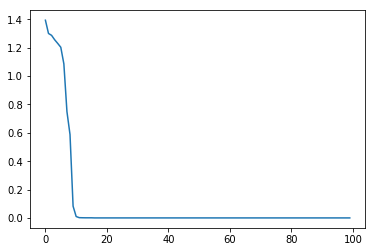

In [38]:
from matplotlib import pyplot

pyplot.plot(swarm.mse)
sc=np.array(best_scores)
swam_sc=np.array(swarm.best_score)
pyplot.savefig('XOR_i10000(100)_s200_centorpy_relu+sig.png')
print(swarm.mse.shape)

In [277]:
print(best_nn1.run(X).T)
print(np.argmax(best_nn1.run(X).T,1))

[[1.00000000e+000 3.42484728e-116]
 [8.92888523e-007 9.99999314e-001]
 [8.92888523e-007 9.99999314e-001]
 [1.00000000e+000 1.62918511e-013]]
[0 1 1 0]


## 2値分類

C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


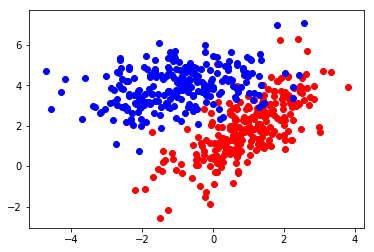

(100,)
[-1.22585167  5.62349694]
[0. 1.]


In [39]:
mean_01 = np.array([1.0, 2.0])
mean_02 = np.array([-1.0, 4.0])

cov_01 = np.array([[1.0, 0.9], [0.9, 2.0]])
cov_02 = np.array([[2.0, 0.5], [0.5, 1.0]])

ds_01 = np.random.multivariate_normal(mean_01, cov_01, 250)
ds_02 = np.random.multivariate_normal(mean_02, cov_02, 250)


pyplot.scatter(ds_01[:, 0], ds_01[:, 1], color='red')
pyplot.scatter(ds_02[:, 0], ds_02[:, 1], color='blue')
pyplot.show()


all_data = np.zeros((500, 3))
all_data[:250, :2] = ds_01
all_data[250:, :2] = ds_02
all_data[250:, -1] = 1

np.random.shuffle(all_data)

split = int(0.8 * all_data.shape[0])
x_train = all_data[:split, :2]
x_test = all_data[split:, :2]
y_train = all_data[:split, -1]
y_test = all_data[split:, -1]


def one_hot(y, depth=10):
    y_1hot = np.zeros((y.shape[0], depth))
    y_1hot[np.arange(y.shape[0]), y] = 1
    return y_1hot

print(y_test.shape)
y_test = one_hot(y_test.astype('int'),2)
y_train = one_hot(y_train.astype('int'),2)


print(x_test[0])
print(y_test[0])

In [42]:
def eval_neural_network(weights, shape, X, y):

        mse = np.asarray([])
        
        for w in weights:
            weights = vector_to_weights(w, shape)
            nn = MultiLayerPerceptron(shape, weights=weights)
            y_pred = nn.run(X).T
           
            #a = nn.calc_error(X,y)
            #print(y_pred.shape)
            a=nn.cross_entropy_error(y_pred,y)
            mse=np.append(mse,a)
            
            #mse = np.append(mse, sklearn.metrics.mean_squared_error(np.atleast_2d(y), y_pred))
            #print("mse",mse)
        return mse
    # Set up
num_inputs = x_train.shape[1]
size = 200
shape = (num_inputs,2,2)
cost_func2 = functools.partial(eval_neural_network, shape=shape, X=x_train, y=y_train)
swarm2 = ParticleSwarm(cost_func2, dim=dim_weights(shape), size=size)

    # Train...

i = 0
epoch = 300
N=1
best_scores = [(i, swarm2.best_score)]
print(best_scores[-1])

                 
while swarm2.best_score > 1e-6 and i<epoch:
    #while i < 1:
        #pso.updata
    for n in range(N):
        swarm2.update()
            
    i = i+1
        
        
    if swarm2.best_score < best_scores[-1][1]:
        best_scores.append((i, swarm2.best_score))
        print(best_scores[-1])
    else :
        if (i%100)==0:
            print(i)

    # Test...

best_weights2 = vector_to_weights(swarm2.g, shape)
    #best_weights = vector_to_weights(pso.__best_position,shape)
best_nn2 = MultiLayerPerceptron(shape, weights=best_weights2)
y_test_pred = np.round(best_nn2.run(x_test))
    
print(best_nn2.run(x_test).T)

self.X :  (200, 12)
S.shape (200,)
(0, 1.4928291730666619)
(1, 1.4267322226462522)
(2, 0.8461953081748631)
(3, 0.4957976475971437)


C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in log
C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in multiply
C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less


(4, 0.3003265925169525)
(6, 0.29838822499419776)
(7, 0.28869720198367244)
(16, 0.28778774554281955)
(20, 0.28444830933394427)
(25, 0.2779630405703226)
(36, 0.27777073339633035)
(39, 0.2777345216791625)
(71, 0.2771599377487846)
(90, 0.27678489402838136)
100
(129, 0.2767721860678635)
(138, 0.27673551068695024)
(143, 0.2764795170491728)
(155, 0.2764781990299729)
(166, 0.276378678027274)
200
(202, 0.27620445484111583)
(204, 0.2761969326742342)
(216, 0.2760527815986675)
(257, 0.2760434102825461)
(286, 0.27601891798434397)
300
[[4.80090150e-05 9.99953403e-01]
 [9.60950222e-01 5.76021828e-02]
 [9.54227461e-01 7.08710891e-02]
 [8.30361600e-01 2.46568936e-01]
 [2.89131786e-02 9.77904678e-01]
 [4.14134532e-02 9.68690657e-01]
 [9.47275317e-01 7.94673750e-02]
 [9.69556518e-01 4.15183620e-02]
 [1.78694575e-04 9.99835067e-01]
 [4.15773757e-03 9.96595895e-01]
 [9.81109059e-01 2.20484191e-02]
 [9.83604922e-01 1.82562163e-02]
 [2.47347461e-04 9.99774523e-01]
 [9.98359489e-01 8.42312048e-04]
 [8.6853829

### 2値分類 Show MSE and Acc

Accuracy  0.94


C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


[1.42673222 0.84619531 0.49579765 0.30032659 0.30032659 0.29838822
 0.2886972  0.2886972  0.2886972  0.2886972  0.2886972  0.2886972
 0.2886972  0.2886972  0.2886972  0.28778775 0.28778775 0.28778775
 0.28778775 0.28444831 0.28444831 0.28444831 0.28444831 0.28444831
 0.27796304 0.27796304 0.27796304 0.27796304 0.27796304 0.27796304
 0.27796304 0.27796304 0.27796304 0.27796304 0.27796304 0.27777073
 0.27777073 0.27777073 0.27773452 0.27773452 0.27773452 0.27773452
 0.27773452 0.27773452 0.27773452 0.27773452 0.27773452 0.27773452
 0.27773452 0.27773452 0.27773452 0.27773452 0.27773452 0.27773452
 0.27773452 0.27773452 0.27773452 0.27773452 0.27773452 0.27773452
 0.27773452 0.27773452 0.27773452 0.27773452 0.27773452 0.27773452
 0.27773452 0.27773452 0.27773452 0.27773452 0.27715994 0.27715994
 0.27715994 0.27715994 0.27715994 0.27715994 0.27715994 0.27715994
 0.27715994 0.27715994 0.27715994 0.27715994 0.27715994 0.27715994
 0.27715994 0.27715994 0.27715994 0.27715994 0.27715994 0.27678

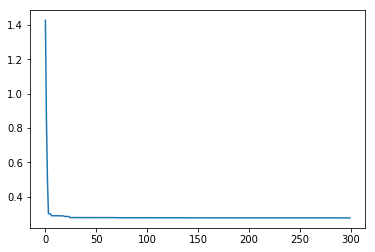

In [44]:
y_test_pred = (best_nn2.run(x_test)).T
y_test_pred = np.argmax(y_test_pred,1)
#y_test_pred = one_hot(y_test_pred,2)
y_test_d1=np.argmax(y_test,1)
count_2 = 0

for i in range(len(x_test)):
    if (y_test_pred[i]==y_test_d1[i]):
        count_2 +=1
#print(y_test_pred[i],y_test[i])
print("Accuracy ",count_2/len(y_test_d1))
pyplot.plot(swarm2.mse)
pyplot.savefig('class2_i300_s200_centorpy_relu+sig.png')
print(swarm2.mse)

## 時系列予測PSO

### PSO

In [14]:
class ParticleSwarm_time:
    #w=0.72984
    def __init__(self, cost_func, dim, size, w=0.72984, phi_p=2.05, phi_g=2.05):
        self.cost_func = cost_func
        self.dim = dim

        self.size = size
        self.w = w
        self.phi_p = phi_p
        self.phi_g = phi_g
        self.mse = []

        self.X = np.random.uniform(size=(self.size, self.dim))
        print("self.X : ",self.X.shape)
        self.V = np.random.uniform(size=(self.size, self.dim))

        self.P = self.X.copy()
        self.S = self.cost_func(self.X)
        print("S.shape",self.S.shape)
        self.g = self.P[self.S.argmin()]
        self.best_score = self.S.min()



    def optimize(self, epsilon=1e-3, max_iter=100):
        iteration = 0

        while self.best_score > epsilon and iteration < max_iter:
            self.update()
            iteration = iteration + 1

        return self.g

    def update(self):
        # Velocities update
        R_p = np.random.uniform(size=(self.size, self.dim))
        R_g = np.random.uniform(size=(self.size, self.dim))

        #self.V = self.w * (self.V + self.phi_p * R_p * (self.P - self.X) + self.phi_g * R_g * (self.g - self.X))
        self.V = self.w *self.V +self.phi_p*R_p*(self.P-self.X)+self.phi_g*R_g*(self.g-self.X)
        #new_vx = w * vx + ro1 * (p["x"] - x) + ro2 * (g["x"] - x)

        # Positions update

        self.X = self.X + self.V

        # Best scores

        scores = self.cost_func(self.X)
        better_scores_idx = scores < self.S
        #print("better_scores_idx",better_scores_idx)
        self.P[better_scores_idx] = self.X[better_scores_idx]
        #print("S[bsi]",self.S[better_scores_idx].shape)
        #print("score[bsi]",scores[better_scores_idx].shape)
        
        self.S[better_scores_idx] = scores[better_scores_idx]
        self.g = self.P[self.S.argmin()]
        
        self.best_score = self.S.min()
        self.mse=np.append(self.mse,self.best_score)

### MLP_time

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

class MultiLayerPerceptron_time:

    def __init__(self, shape, weights=None):
        self.shape = shape
        self.num_layers = len(shape)

        if weights is None:
            self.weights = []

            for i in range(self.num_layers-1):
                W = np.random.uniform(size=(self.shape[i+1], self.shape[i] + 1))
                self.weights.append(W)

        else:
            self.weights = weights

    def softmax(self, Z):
        """ソフトマックス関数"""
        return np.exp(Z)/np.sum(np.exp(Z), axis=1)[:, np.newaxis]

    def relu(self,Z):
        return   numpy.vectorize(lambda x: (np.maximum(x, 0)))(Z)

    def sigmoid(self,Z):
        return  1/ (1 + np.exp(-Z))
    
    def run(self, data):
        layer = data.T

        for i in range(self.num_layers-1):
            prev_layer = np.insert(layer, 0, 1, axis=0)
            o = np.dot(self.weights[i], prev_layer)
            #layer = 1 / (1 + np.exp(-o))
            #"""
            if i < (self.num_layers-2.0):
                layer = self.sigmoid(o)
                #layer = self.relu(o)
                
            if i==(self.num_layers-2.0):
                #print("relu",layer)
                layer = self.sigmoid(o)
                #layer = self.relu(o)

                #print("sigmoid",layer)
            #"""
            #layer = o
            
        return layer
    
    def calc_error(self, X, T):
        N = X.shape[0]
        err = 0.0
        for i in range(N):
            x = X[i, :]
            t = T[i, :]
            
            y = self.run(x)
            
            #print("z",z)
            #z [0.82279137 0.73710344]
            #print("y",y)
            #y [0.83577613 0.78362455]
            #print("t",t)
            #t [1 0]
            #print("y-t",(y-t).shape)
            #yy-t [ 0.81261095 -0.1861338 ]
            #shape[2,]
            #print("reshap(-1,1)",((y - t).reshape((-1, 1))).shape)
            #reshap(-1,1) [[ 0.81261095][-0.1861338 ]]
            #shape[2,1]
            #print("dot",(y-t).dot(y - t).reshape((-1, 1)))
            #dot [[0.77263737]]
            a=(y-t)[0]
            b=(y-t)[1]
            err_ = np.abs((a-b)/2)
            #print("mse:",err_)
            
            err += (y - t).dot((y - t).reshape((-1, 1))) / 2.0
            #print("err",err)
            #if i==0:
                    #print("err",err)
        return err_

    #交差エントロピー誤差
    def cross_entropy_error(self,X, T):
        delta = 1e-7
        N = X.shape[0]
        error = 0.0
        for i in range(N):
            x = X[i, :]
            t = T[i, :]
            #error = error -np.sum(t*np.log(x+delta))
            error = error - np.sum(t * np.log(x+delta) + (1 - t) * np.log(1 - x))
            
        error = error/N
        return error
  

### TIME SERIES

In [378]:
import pandas as pd
df_forex = pd.read_csv('Forex_data/USDJPY1_2018_1103.csv',encoding='cp932')


In [453]:
nikkei_true_train= []
nikkei_true_test = []
#maxlen = 150
maxlen = 48


nikkei_std =(df_forex['CLOSE'] - df_forex['CLOSE'].min())/(df_forex['CLOSE'].max()-df_forex['CLOSE'].min())


#pre_nikkei_std =(df_nikkei['PRIV'] - df_nikkei['CLOSE'].min())/(df_nikkei['CLOSE'].max()-df_nikkei['CLOSE'].min())
#----------------------------------------------------------------


split = int(len(nikkei_std)*0.7)

print(split)
nikkei_std = np.array(nikkei_std)
nikkei_x_train = nikkei_std[:split]
nikkei_x_test = nikkei_std[split:]

#----------------------------------------------------------------

#-------------正規化を戻す-----------------------------------
def std_remake(predict):
    
    
    nikkei_mean =df_forex['CLOSE'].mean()
    nikkei_std = df_forex['CLOSE'].std()

    
    return predict*nikkei_std+nikkei_mean
#--------------------------------------------------------------

print(nikkei_std)#shape(1426,),[-0.85234 -0.90423 ...]
print(nikkei_x_test.shape)#shape(428,)
print(nikkei_x_train.shape)#shape(998,)

def make_dataset(low_data,maxlen):
    input = []
    maxlen = maxlen
    data, target = [], []

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:(i + maxlen)])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen)
    re_target = np.array(target).reshape(len(data))

    return re_data, re_target


#g -> 学習データ，h -> 学習ラベル
pre_g, pre_h = make_dataset(nikkei_x_test,maxlen)
g, h = make_dataset(nikkei_x_train,maxlen)





print(g.shape)
print(h.shape)

print(pre_g.shape)
print(pre_h.shape)

g.shape[1]
#g, h = make_dataset(X_std)

998
[0.38391225 0.37294333 0.37659963 ... 0.43875686 0.43510055 0.42413163]
(428,)
(998,)
(950, 48)
(950,)
(380, 48)
(380,)


48

### NETWORK

In [431]:
def eval_neural_network_time(weights, shape, X, y):

        mse = np.asarray([])
        
        for w in weights:
            weights = vector_to_weights(w, shape)
            nn = MultiLayerPerceptron(shape, weights=weights)
            y_pred = nn.run(X).T
           
            #a = nn.calc_error(X,y)
            #print(y_pred.shape)
            a = mean_squared_error(y, y_pred)
            #a=nn.cross_entropy_error(y_pred,y)
            mse=np.append(mse,a)
            
            #mse = np.append(mse, sklearn.metrics.mean_squared_error(np.atleast_2d(y), y_pred))
            #print("mse",mse)
        return mse
    # Set up
num_inputs = g.shape[1]
size = 50
shape = (num_inputs,32,32,1)
cost_func_time = functools.partial(eval_neural_network_time, shape=shape, X=g, y=h)
swarm_time = ParticleSwarm_time(cost_func_time, dim=dim_weights(shape), size=size)

    # Train...

i = 0
epoch = 1000
N=1
best_scores = [(i, swarm_time.best_score)]
print(best_scores[-1])

                 
while swarm_time.best_score > 1e-6 and i<epoch:
    #while i < 1:
        #pso.updata
    for n in range(N):
        swarm_time.update()
            
    i = i+1
        
        
    if swarm_time.best_score < best_scores[-1][1]:
        best_scores.append((i, swarm_time.best_score))
        print(best_scores[-1])
        print(swarm_time.S)
    else :
        if (i%100)==0:
            print(i)

    # Test...

best_weights_time = vector_to_weights(swarm_time.g, shape)
    #best_weights = vector_to_weights(pso.__best_position,shape)
best_nn_time = MultiLayerPerceptron(shape, weights=best_weights_time)
y_test_pred = best_nn_time.run(pre_g)
    
print(best_nn_time.run(pre_g).T)

self.X :  (50, 2657)
S.shape (50,)
(0, 0.22233258268467238)
(2, 0.1845236291408609)
[0.22225078 0.21984145 0.22233021 0.22231803 0.22202676 0.22233484
 0.2212041  0.22232395 0.2223338  0.22162426 0.22232964 0.22229076
 0.22232244 0.22233467 0.22233106 0.22231771 0.22110453 0.22233148
 0.22214335 0.22229754 0.22232856 0.22215803 0.22233489 0.22165919
 0.22228045 0.22185755 0.22225148 0.21489764 0.2188655  0.22229485
 0.2222848  0.22224611 0.22230269 0.22229194 0.22232773 0.22233399
 0.22228069 0.22219933 0.22232298 0.22231353 0.22232721 0.22232904
 0.22205374 0.22231523 0.22232961 0.22227576 0.22221088 0.22232952
 0.18452363 0.22221815]
(3, 0.07757738981420202)
[0.22225078 0.21984145 0.22233021 0.19684251 0.22202676 0.0962014
 0.2212041  0.10681603 0.14454634 0.22162426 0.22232964 0.22229076
 0.22232244 0.21973557 0.07757739 0.11749544 0.22110453 0.22233148
 0.22214335 0.22229754 0.22232856 0.22215803 0.22233489 0.22165919
 0.22228045 0.22185755 0.22225148 0.21489764 0.2188655  0.222294

 0.0346167  0.04711046]
(731, 0.022560964882139288)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.06618957 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.05437274 0.11707649 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.09004295 0.06553963
 0.08400054 0.02256096 0.03766095 0.07030119 0.02911185 0.02851445
 0.07676959 0.02482694 0.06098062 0.03498737 0.04490296 0.05995426
 0.0346167  0.04711046]
(733, 0.022560953075590157)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.06618957 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.05437274 0.11707649 0.06817047 0.09675866
 0.07596181 0.06661909 0.07

(746, 0.0225604264350976)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.06618957 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.05437274 0.11707649 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.09004295 0.06553963
 0.08400054 0.02256043 0.03766095 0.07030119 0.02911185 0.02851445
 0.07676959 0.02482694 0.06098062 0.03498737 0.04490296 0.05995426
 0.0346167  0.04711046]
(747, 0.022560424052466766)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.06618957 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.05437274 0.11707649 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.090042

(760, 0.022560417724379403)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.06618957 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.05437274 0.11595019 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.09004295 0.06553963
 0.08400054 0.02256042 0.03766095 0.07030119 0.02911185 0.02851445
 0.07676959 0.02482694 0.06098062 0.03498737 0.04490296 0.05995426
 0.0346167  0.04711046]
(761, 0.02256041769540005)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.06618957 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.05437274 0.11595019 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.09004

(774, 0.02256041761841736)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.06618957 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.04554147 0.11595019 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.09004295 0.06553963
 0.08400054 0.02256042 0.03766095 0.07030119 0.02911185 0.02851445
 0.07676959 0.02482694 0.06098062 0.03498737 0.04490296 0.05995426
 0.0346167  0.04711046]
(775, 0.02256041761806476)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.06618957 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.04554147 0.11595019 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.090042

(788, 0.02256041761712809)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.06618957 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.04554147 0.11595019 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.09004295 0.06553963
 0.08400054 0.02256042 0.03766095 0.07030119 0.02911185 0.02851445
 0.07676959 0.02482694 0.06098062 0.03498737 0.04490296 0.05995426
 0.0346167  0.04711046]
(789, 0.022560417617123803)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.05461319 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.04554147 0.11595019 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.09004

(802, 0.022560417617112406)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.05461319 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.04554147 0.11595019 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.09004295 0.06553963
 0.08400054 0.02256042 0.03766095 0.07030119 0.02911185 0.02851445
 0.07676959 0.02482694 0.06098062 0.03498737 0.04490296 0.05995426
 0.0346167  0.04711046]
(803, 0.022560417617112354)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.05461319 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.04554147 0.11595019 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.0900

(824, 0.0225604176171122)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.05461319 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.08701889 0.08465146
 0.03595855 0.04756957 0.04554147 0.11595019 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.09004295 0.06553963
 0.08400054 0.02256042 0.03766095 0.07030119 0.02911185 0.02851445
 0.07676959 0.02482694 0.06098062 0.03498737 0.04490296 0.05995426
 0.0346167  0.04711046]
(864, 0.022560417617112197)
[0.07397667 0.04718519 0.03798149 0.04169863 0.034083   0.08545668
 0.0769602  0.07336991 0.05226293 0.05461319 0.05243524 0.03547649
 0.05673814 0.07142726 0.06550115 0.04769102 0.05854167 0.0578442
 0.06199512 0.03542872 0.08334322 0.0692721  0.07512225 0.08465146
 0.03595855 0.04756957 0.04554147 0.11595019 0.06817047 0.09675866
 0.07596181 0.06661909 0.07673697 0.08268328 0.090042

### 検証用

C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


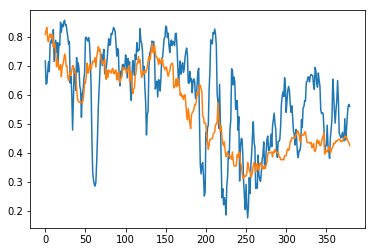

In [432]:
test = best_nn_time.run(pre_g).T

#print(test)

#pyplot.plot(swarm_time.mse)
#"""
pyplot.plot(test)
pyplot.plot(pre_h)
#"""



## Logistics

### Data

(318, 2)


C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


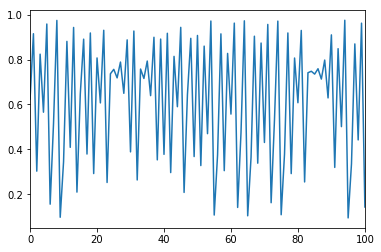

In [12]:
def logistic(a):
    x = [0.8]
    for i in range(400):
        x.append(a * x[-1] * (1 - x[-1]))
    return x[-400:]

"""
for a in np.linspace(2.0, 4.0, 1000):
    x = logistic(a)
    pyplot.plot([a]*len(x), x, "c.", markersize=1.7)

"""
    
x = logistic(3.9)
pyplot.plot(x)
pyplot.xlim(0,100)
#pyplot.savefig('logistic_a3.9[0,100].png')
split_log = int(len(x)*0.8)

x_train = x[0:split_log]
x_test = x[split_log:]
len(x_test)

g_log,h_log=make_dataset(x_train,2)
pre_g_log,pre_h_log=make_dataset(x_test,2)
print(g_log.shape)

### NETWORK

In [20]:
def eval_neural_network_time(weights, shape, X, y):

        mse = np.asarray([])
        
        for w in weights:
            weights = vector_to_weights(w, shape)
            nn = MultiLayerPerceptron_time(shape, weights=weights)
            y_pred = nn.run(X).T
           
            #a = nn.calc_error(X,y)
            #print(y_pred.shape)
            a = mean_absolute_error(y, y_pred)
            #a=nn.cross_entropy_error(y_pred,y)
            mse=np.append(mse,a)
            
            #mse = np.append(mse, sklearn.metrics.mean_squared_error(np.atleast_2d(y), y_pred))
            #print("mse",mse)
        return mse
    # Set up
num_inputs = g_log.shape[1]
size = 300
shape = (num_inputs,64,1)
cost_func_time = functools.partial(eval_neural_network_time, shape=shape, X=g_log, y=h_log)
swarm_time = ParticleSwarm_time(cost_func_time, dim=dim_weights(shape), size=size)

    # Train...

i = 0
epoch = 2000
N=1
best_scores = [(i, swarm_time.best_score)]
print(best_scores[-1])

                 
while swarm_time.best_score > 1e-6 and i<epoch:
    #while i < 1:
        #pso.updata
    for n in range(N):
        swarm_time.update()
            
    i = i+1
        
        
    if swarm_time.best_score < best_scores[-1][1]:
        best_scores.append((i, swarm_time.best_score))
        print(best_scores[-1])
        #print(swarm_time.S)
    else :
        if (i%100)==0:
            print(i)

    # Test...

best_weights_time = vector_to_weights(swarm_time.g, shape)
    #best_weights = vector_to_weights(pso.__best_position,shape)
best_nn_time = MultiLayerPerceptron_time(shape, weights=best_weights_time)
y_test_pred = best_nn_time.run(pre_g_log)
    
print(best_nn_time.run(pre_g_log).T)

self.X :  (300, 257)
S.shape (300,)
(0, 0.4034879729319944)
(2, 0.38923087555042035)
(3, 0.2775899040876735)
(4, 0.23746052007536386)
(5, 0.1741505120398898)
(6, 0.1583763459239279)
(8, 0.14237151725409203)
(9, 0.11695821532542074)
(40, 0.09550572153771145)
100
200
(241, 0.08908401708709322)
(287, 0.06190289669489861)
(296, 0.05810358935825379)
300
(343, 0.055422684951734164)
(354, 0.05492272675141624)
400
(425, 0.054845386645014226)
(429, 0.054716823105353224)
(430, 0.05464693437317905)
(432, 0.054641083518817586)
(434, 0.05461642177391424)
(435, 0.054534149803725014)
(436, 0.054508415378229376)
(439, 0.05450736256416886)
(440, 0.05449696600195451)
(441, 0.05449036223381853)
(442, 0.05448578313651124)
(443, 0.0544824904967793)
(444, 0.05448011365372693)
(445, 0.05447839290924263)
(446, 0.05447714447666468)
(447, 0.05447623727892441)
(448, 0.054475577277243135)
(449, 0.054475096703856855)
(450, 0.054474746559815344)
(451, 0.05447449132897475)
(452, 0.05447430522081749)
(453, 0.05447416

### 検証用

C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


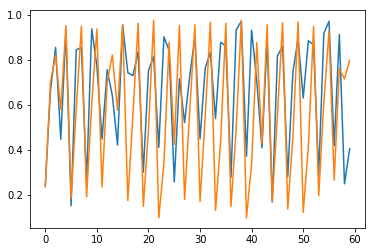

In [475]:
test = best_nn_time.run(pre_g_log).T
train = best_nn_time.run(g_log).T


#print(test)

#pyplot.plot(swarm_time.mse)
#"""
pyplot.plot(test)
#pyplot.plot(train)
#pyplot.plot(h_log)
pyplot.plot(pre_h_log)
#"""

C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


"\ntest = best_nn_time.run(pre_g_log).T\ntrain = best_nn_time.run(g_log).T\n\n\n#print(test)\n\n#pyplot.plot(swarm_time.mse)\npyplot.plot(test)\n#pyplot.plot(train)\n#pyplot.plot(h_log)\npyplot.plot(pre_h_log)\npyplot.savefig('Logistics_i2000_s300_mae_sig+sig.png')\n#"

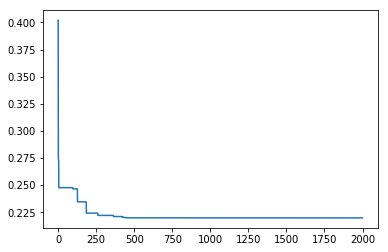

In [74]:
pyplot.plot(swarm_time.mse)
pyplot.savefig('(Loss)Logistics_i2000_s300_mae_sig+sig.png')

"""
test = best_nn_time.run(pre_g_log).T
train = best_nn_time.run(g_log).T


#print(test)

#pyplot.plot(swarm_time.mse)
pyplot.plot(test)
#pyplot.plot(train)
#pyplot.plot(h_log)
pyplot.plot(pre_h_log)
pyplot.savefig('Logistics_i2000_s300_mae_sig+sig.png')
#"""


# Experience

In [361]:
def cross_entropy_error_e(X, T):
        delta = 1e-7
        N = X.shape[0]
        error = 0.0
        for i in range(N):
            x = X[i, :]
            t = T[i, :]
            print("e:",-np.sum(t*np.log(x+delta)))
            error = error -np.sum(t*np.log(x+delta))
        error = error/N
        return error
    
XX = [[0.09500,0.9999],[0,0.999999],[0.3,0.7],[0.99,0.2]]
TT = [[1,0],[0,1],[1,0],[0,1]]

print(cross_entropy_error_e(np.array(XX),np.array(TT)))

e: 2.353877334750571
e: 9.000004050816343e-07
e: 1.2039724709926583
e: 1.6094374124342252
1.291822029544465


In [122]:
a=[0,1]
y=[0,1]
-np.sum(np.array(y)*np.log(np.array(a)+0.00001))

-9.999950000398841e-06

In [260]:
print(best_nn.run(X).T)
print(np.argmax(best_nn.run(X).T,1))
print(best_nn1.run(X).T)
print(np.argmax(best_nn1.run(X).T,1))

[[8.36351679e-01 0.00000000e+00]
 [4.14015580e-02 9.99918418e-01]
 [2.71110145e-02 9.99997483e-01]
 [8.20980981e-01 1.17072300e-14]]
[0 1 1 0]


In [155]:
print(5.07353223e-02)
print(9.99999996e-01)


0.0507353223
0.999999996


In [212]:
a = 4
for i in range(a-1):
    print(i)
    if i==(a-2):
        print("Soft",i)

0
1
2
Soft 2


In [1]:
#lang = input()
#print(lang[0])
for i in range(3):
    lang=input()
    
    

abc
def
ghi


In [4]:
lang

'ghi'

In [ ]:

x = input("input x :")
y = input("input y :")
y = int(y)
x = int(x)
z = x*y
if(z%2==0):
    print("even",z)
else:
    print("奇数",z)
print(x*y)

# CommonFunction

In [11]:
def make_dataset(low_data,maxlen):
    input = []
    maxlen = maxlen
    data, target = [], []

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:(i + maxlen)])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen)
    re_target = np.array(target).reshape(len(data))

    return re_data, re_target

In [19]:
def dim_weights(shape):
    dim = 0

    for i in range(len(shape)-1):
        dim = dim + (shape[i] + 1) * shape[i+1]
        #print("dim =",dim)
    return dim

def weights_to_vector(weights):
    w = np.asarray([])

    for i in range(len(weights)):
        v = weights[i].flatten()
        w = np.append(w, v)
    print("weghts_to_vector : ",w)
    return w

def vector_to_weights(vector, shape):
    weights = []
    idx = 0

    for i in range(len(shape)-1):
        r = shape[i+1]
        c = shape[i] + 1
        idx_min = idx
        idx_max = idx + r*c
        W = vector[idx_min:idx_max].reshape(r,c)
        weights.append(W)

    return weights

# Import

In [9]:
import numpy as np
import numpy.random
import functools
import sklearn.metrics
import sklearn.datasets
import sklearn.cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
import sklearn

C:\Users\LSL\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
